In [273]:
# Setup básico
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import math

1. Juntar todas as imagens em uma única

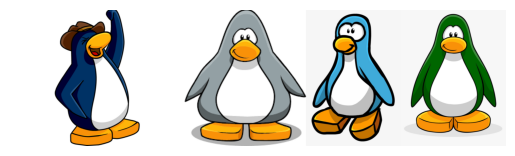

In [274]:
def merge_images(images):
    max_height = max(image.size[1] for image in images)
    
    resized_images = []
    for image in images:
        width, height = image.size
        new_width = int(width * (max_height / height))
        resized_image = image.resize((new_width, max_height))
        resized_images.append(resized_image)

    total_width = sum(image.size[0] for image in resized_images)

    merged_image = Image.new('RGB', (total_width, max_height))

    current_x = 0
    for img in resized_images:
        merged_image.paste(img, (current_x, 0))
        current_x += img.size[0]

    return merged_image
    
def main():
    image1 = Image.open('P1.png')
    image2 = Image.open('P2.png')
    image3 = Image.open('P3.jpg')
    image4 = Image.open('P4.png')

    merged_image = merge_images([image1, image2, image3, image4])

    merged_image.save('merged_image.jpg')

    plt.imshow(np.array(merged_image))
    plt.axis('off')
    plt.show()
    
if __name__ == '__main__':
    main()

2. Trocar as cores (mudar a cor dos pinguins para qualquer outra)

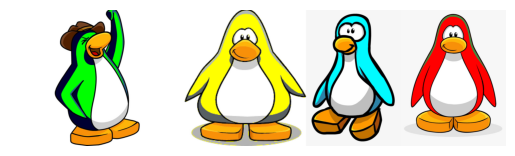

In [275]:
def calculate_color_distance(color1, color2):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    return math.sqrt((r1 - r2)**2 + (g1 - g2)**2 + (b1 - b2)**2)

def change_dominant_color_per_position(image, x1, y1, x2, y2, to_color, dominant_color=2, tolerance=30):
    if image.mode != 'RGB':
        image = image.convert('RGB')

    width, height = image.size
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(width, x2)
    y2 = min(height, y2)

    if x1 >= x2 or y1 >= y2:
        return image

    pixels = image.load()
    color_counts = Counter()
    for x in range(x1, x2):
        for y in range(y1, y2):
                current_pixel = pixels[x, y]
                color_counts[current_pixel] += 1

    if not color_counts:
        return image

    most_common_colors = color_counts.most_common(dominant_color)

    if len(most_common_colors) < dominant_color:
        print("Não foi encontrada uma cor dominante na região.")
        return image
    else:
        target_dominant_color = most_common_colors[dominant_color-1][0]

    for x in range(x1, x2):
        for y in range(y1, y2):
            current_color = pixels[x, y]
            if calculate_color_distance(current_color, target_dominant_color) <= tolerance:
                pixels[x, y] = to_color
                
    image = image.convert('RGB')

    return image

def main():
    image1 = Image.open('merged_image.jpg')

    xImage, yImage = image1.size
    
    to_color = (0, 255, 0)
    x1, y1 = xImage // 12 * 1, 0    
    x2, y2 = xImage // 20 * 6, yImage    

    p1 = change_dominant_color_per_position(image1, x1, y1, x2, y2, to_color, 2, 30)
    
    to_color = (255, 255, 0)
    x1, y1 = xImage // 20 * 6, 0
    x2, y2 = xImage // 20 * 12, yImage
    p2 = change_dominant_color_per_position(p1, x1, y1, x2, y2, to_color, 2, 35)
    
    to_color = (1, 250, 255)
    x1, y1 = xImage // 20 * 12, 0
    x2, y2 = xImage // 20 * 16, yImage
    p3 = change_dominant_color_per_position(p2, x1, y1, x2, y2, to_color, 4, 60)
    
    to_color = (255, 0, 0)
    x1, y1 = xImage // 20 * 16, 0
    x2, y2 = xImage // 20 * 20, yImage
    p4 = change_dominant_color_per_position(p3, x1, y1, x2, y2, to_color, 3, 80)
    p4.save('modified_image.jpg')

    plt.imshow(np.array(p3))
    plt.axis('off')
    plt.show()
    
if __name__ == '__main__':
    main()

3. Aplicar o espelhamento

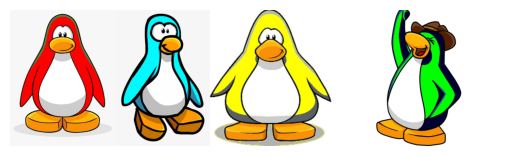

In [276]:
def mirror_image(image):
    """Mirror the image horizontally."""
    # Convert the image to RGB if it's not
    if image.mode != 'RGB':
        image = image.convert('RGB')
        
    # Get the pixel data
    data = np.array(image)
    # Mirror the image data
    mirrored_data = np.flip(data, axis=1)
    # Create a new image from the mirrored data
    mirrored_image = Image.fromarray(mirrored_data)

    return mirrored_image

def main():
    image1 = Image.open('modified_image.jpg')

    mirrored_image = mirror_image(image1)
    mirrored_image.save('mirrored_image.jpg')

    plt.imshow(np.array(mirrored_image))
    plt.axis('off')
    plt.show()
if __name__ == '__main__':
    main()

4. Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).

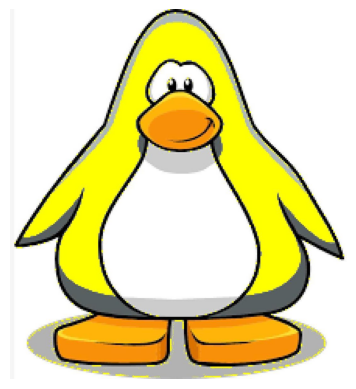

In [277]:
def cut_image(image):
    """Cut the image in last 1/4 width."""
    # Convert the image to RGB if it's not
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Get the pixel data
    data = np.array(image)
    
    width = data.shape[1]

    # Cut the image data
    cut_data = data[:, width // 10 * 4 : width // 10 * 4 + width // 12 * 3]

    # Create a new image from the cut data
    cut_image = Image.fromarray(cut_data)

    return cut_image


def main():
    image1 = Image.open('mirrored_image.jpg')
    
    cutted_image = cut_image(image1)
    cutted_image.save('cut_image.jpg')
    
    plt.imshow(np.array(cutted_image))
    plt.axis('off')
    plt.show()
    


if __name__ == '__main__':
    main()

5. Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold. (Justifique a escolha do threshold)

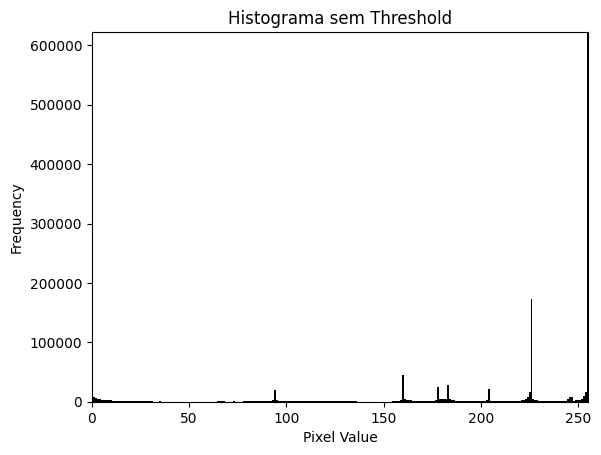

Threshold escolhido: 226
Motivo da escolha: O segundo maior valor, indicando um limite entre os dois maiores picos do histograma.
O primeiro pico é o fundo, e o segundo pico é o objeto.


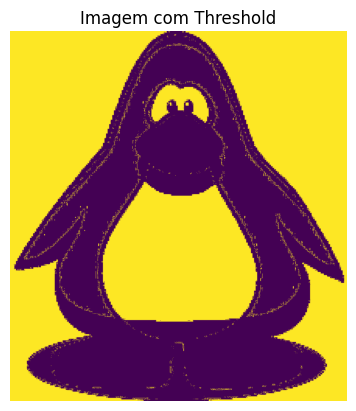

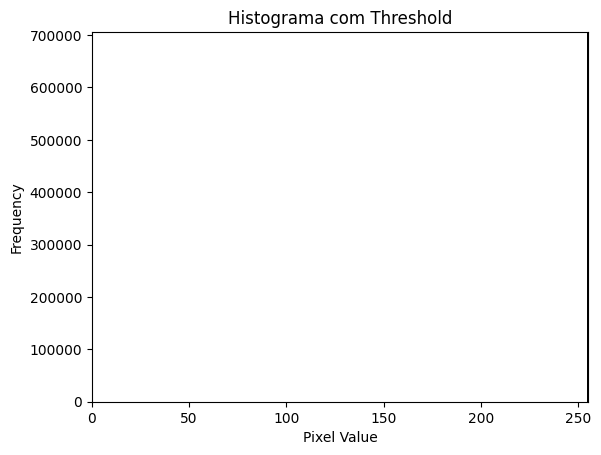

In [288]:
def apply_threshold(image, threshold=128):
    """Apply a threshold to the image to convert it to black and white."""
    # Convert the image to grayscale
    gray_image = image.convert('L')

    # Apply the threshold
    binary_image = gray_image.point(lambda p: 255 if p > threshold else 0)

    return binary_image

def gen_histogram(image):
    """Generate a histogram of the image."""
    # Convert the image to grayscale
    gray_image = image.convert('L')

    # Get the pixel data
    data = np.array(gray_image)

    # Create a histogram
    histogram, bin_edges = np.histogram(data, bins=256, range=(0, 255))
    
    return histogram
    
def main():
    image1 = Image.open('cut_image.jpg')
    
    histogram = gen_histogram(image1)
    
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim(0, 255)
    plt.ylim(0, max(histogram))
    plt.bar(range(256), histogram, width=1, color='black')
    plt.title('Histograma sem Threshold')
    plt.show()
    
    threshold = histogram.argsort()[-2]
    
    print(f'Threshold escolhido: {threshold}')
    print('Motivo da escolha: O segundo maior valor, indicando um limite entre os dois maiores picos do histograma.')
    print('O primeiro pico é o fundo, e o segundo pico é o objeto.')
    
    image_thresholded = apply_threshold(image1, threshold)
    
    image_thresholded.save('image_thresholded.jpg')
    plt.imshow(np.array(image_thresholded))
    plt.axis('off')
    plt.title('Imagem com Threshold')
    plt.show()
    
    histogram_thresholded = gen_histogram(image_thresholded)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim(0, 255)
    plt.ylim(0, max(histogram_thresholded))
    plt.bar(range(256), histogram_thresholded, width=1, color='black')
    plt.title('Histograma com Threshold')
    plt.show()
    
    
   
    
if __name__ == '__main__':
    main()

6. Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)

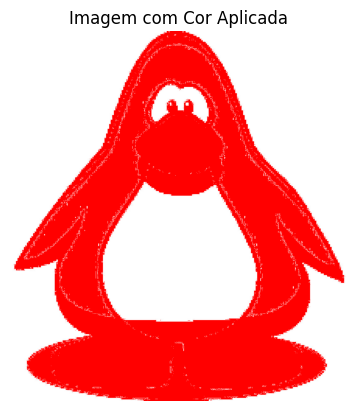

In [289]:
def apply_color_below_threshold(original_color_image, gray_image, threshold_value, target_color_rgb):
    """
    Applies a specific color to pixels at or below a threshold, based on grayscale intensity.

    Args:
        original_color_image (PIL.Image.Image): The original image (in color).
        gray_image (PIL.Image.Image): The grayscale version (mode 'L') of the image.
        threshold_value (int): The threshold (0-255).
        target_color_rgb (tuple): The RGB tuple (R, G, B) for the target color.

    Returns:
        PIL.Image.Image: A new image with pixels below/at threshold colored.
    """
    if original_color_image.mode != 'RGB':
        original_color_image = original_color_image.convert('RGB')
    if gray_image.mode != 'L':
        gray_image = gray_image.convert('L')
        
    # Convert images to numpy arrays
    original_color_data = np.array(original_color_image)
    gray_data = np.array(gray_image)
    
    # Create a mask for pixels below/at the threshold
    mask = gray_data <= threshold_value
    # Create an output image
    output_image = np.zeros_like(original_color_data)
    # Apply the target color to the output image where the mask is True
    output_image[mask] = target_color_rgb
    # Apply the original color where the mask is False
    output_image[~mask] = original_color_data[~mask]
    # Convert the output image back to PIL Image
    output_image = Image.fromarray(output_image)
    
    return output_image
    
    
def main():
    image1 = Image.open('image_thresholded.jpg')

    # Convert the image to grayscale
    gray_image = image1.convert('L')
    
    colored_image = apply_color_below_threshold(image1, gray_image, 226, (255, 0, 0))
    
    colored_image.save('colored_image.jpg')
    
    plt.imshow(np.array(colored_image))
    plt.axis('off')
    plt.title('Imagem com Cor Aplicada')
    plt.show()
    
if __name__ == '__main__':
    main()